# Analysis of Heuristic Criticality Scores

**Objective:** To load the criticality scores generated by `score_criticality_heuristic.py` and visualize them alongside the corresponding scenario animation. This serves as a powerful sanity check to ensure our heuristic rules are correctly identifying "interesting" and "critical" moments in the data.

In [ ]:
# ## 1. Setup and Configuration

# +
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import random

# Add project root to path
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if PROJECT_ROOT not in sys.path:
    sys.path.append(PROJECT_ROOT)

from src.utils.config import load_config
# We'll reuse the visualization logic from the parser validation
from src.data_processing.validate_parser_output import visualize_scenario

# Load project config and set plot style
config = load_config(config_path='../configs/main_config.yaml')
sns.set_theme(style="whitegrid")

Configuration loaded successfully.


In [ ]:
# ## 2. Load a Random Scenario and its Scores
# 
# We'll pick a random scenario from the validation set and load both its `.npz` data file and its corresponding `.npy` score file.

validation_npz_dir = os.path.join(config['data']['processed_npz_dir'], 'validation')
heuristic_scores_dir = os.path.join(config['data']['criticality_scores_dir'], 'timestep_level', 'heuristic', 'validation')  # timestep_level\heuristic\validation

all_npz_files = glob(os.path.join(validation_npz_dir, '*.npz'))
if not all_npz_files:
    raise FileNotFoundError(f"No .npz files found in {validation_npz_dir}.")

# Select a random file
random_npz_file = random.choice(all_npz_files)
scenario_id = os.path.splitext(os.path.basename(random_npz_file))[0]
score_file_path = os.path.join(heuristic_scores_dir, f"{scenario_id}.npy")

if not os.path.exists(score_file_path):
    raise FileNotFoundError(f"Score file for {scenario_id} not found. Please run the scoring script.")

print(f"Loading scenario: {scenario_id}")
scenario_data = np.load(random_npz_file, allow_pickle=True)
scores = np.load(score_file_path)

print(f"Scenario data loaded. Number of timesteps: {len(scenario_data['timestamps'])}")
print(f"Scores loaded. Shape: {scores.shape}")
assert len(scores) == len(scenario_data['timestamps']), "Score and scenario length mismatch!"

FileNotFoundError: Score file for 7b401ecc9d7facfb not found. Please run the scoring script.

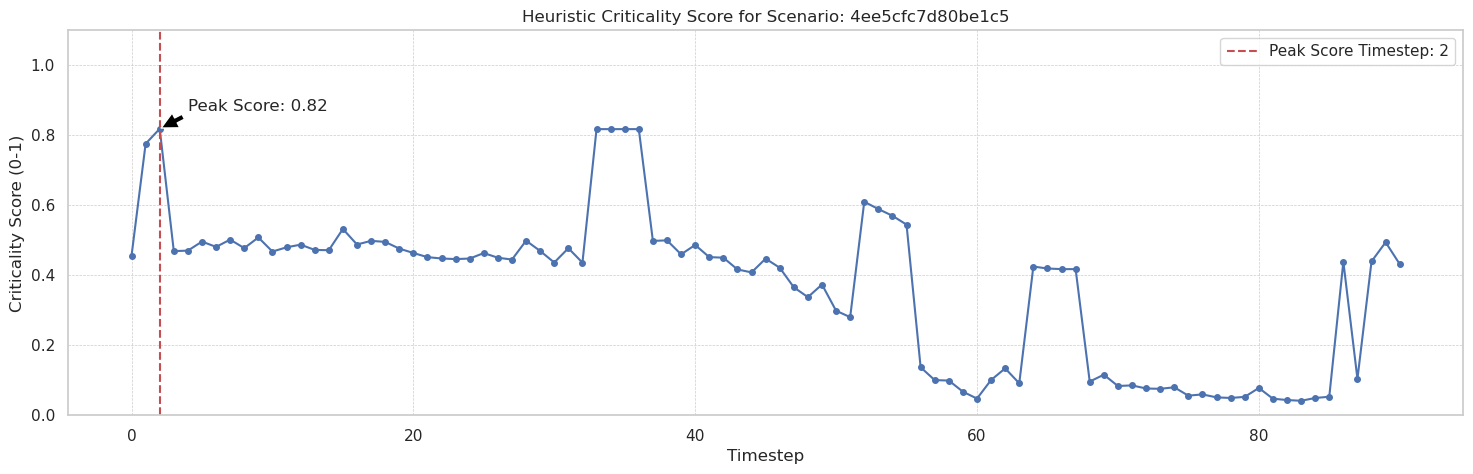

The most critical moment occurs at timestep 2.


In [16]:
# ## 3. Plot the Criticality Score Over Time
# 
# This plot will show us where the "interesting" moments are according to our heuristics.

# +
fig, ax = plt.subplots(figsize=(18, 5))
timesteps = np.arange(len(scores))
ax.plot(timesteps, scores, marker='o', linestyle='-', markersize=4)
ax.set_title(f'Heuristic Criticality Score for Scenario: {scenario_id}')
ax.set_xlabel('Timestep')
ax.set_ylabel('Criticality Score (0-1)')
ax.set_ylim(0, 1.1)
ax.grid(True, which='both', linestyle='--', linewidth=0.5)

# Highlight the most critical timestep
most_critical_timestep = np.argmax(scores)
peak_score = np.max(scores)
ax.axvline(x=most_critical_timestep, color='r', linestyle='--', label=f'Peak Score Timestep: {most_critical_timestep}')
ax.annotate(f'Peak Score: {peak_score:.2f}', 
            xy=(most_critical_timestep, peak_score), 
            xytext=(most_critical_timestep + 2, peak_score + 0.05),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=12)

plt.legend()
plt.show()

print(f"The most critical moment occurs at timestep {most_critical_timestep}.")

In [ ]:
# ## 4. Visual Verification with Animation
# 
# Now, let's generate the animation for this specific scenario. When you watch the video, pay close attention to what happens around the timestep identified above.
# 
# **Expected Behavior:** Around the `Peak Score Timestep`, you should observe one or more of the following:
# - The SDC (cyan vehicle) is braking or accelerating hard.
# - The SDC is turning sharply.
# - The SDC is very close to another agent (a potential near-miss).
# - The scene is crowded with many other agents.

# +
# Note: This will generate and save an MP4 file in `outputs/validation_videos`
# You will need to open and watch the video file yourself after this cell runs.

# First, we need to make sure the visualize_scenario function is available.
# We will import it from the validation script.
try:
    from src.data_processing.validate_parser_output import visualize_scenario
    print("Generating scenario animation... this may take a minute.")
    visualize_scenario(random_npz_file, output_dir=os.path.join('outputs', 'validation_videos', 'heuristic'))
    print("\n✅ Animation saved. Please open the .mp4 file in 'outputs/validation_videos' and "
          f"inspect the behavior around timestep {most_critical_timestep}.")
except ImportError:
    print("\n❌ Could not import `visualize_scenario`. Please make sure the validation script exists.")
except Exception as e:
    print(f"\n❌ An error occurred during animation: {e}")

Generating scenario animation... this may take a minute.
Loading scenario from: /mnt/d/waymo_datasets/waymo_longtail_rl_data/processed_npz/validation/4ee5cfc7d80be1c5.npz
Creating animation for timestep 0 to 90...
Animation saved to: outputs/validation_videos/heuristic/4ee5cfc7d80be1c5.mp4

✅ Animation saved. Please open the .mp4 file in 'outputs/validation_videos' and inspect the behavior around timestep 2.


interactive(children=(FloatSlider(value=0.4, description='Volatility', max=1.0, step=0.05), FloatSlider(value=…

<function __main__.plot_and_animate_scenario(w_volatility, w_interaction, w_off_road, w_density)>